In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | lovozero
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | vila
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | gravdal
Processing Record 11 of Set 1 | ballina
Processing Record 12 of Set 1 | flinders
Processing Record 13 of Set 1 | bathsheba
Processing Record 14 of Set 1 | geraldton
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | krasnaya poyma
Processing Record 17 of Set 1 | samusu
City not found. Skipping...
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | khonuu
City not found. Skipping...
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | va

Processing Record 40 of Set 4 | rio grande
Processing Record 41 of Set 4 | chuy
Processing Record 42 of Set 4 | tawau
Processing Record 43 of Set 4 | nanchang
Processing Record 44 of Set 4 | brokopondo
Processing Record 45 of Set 4 | clyde river
Processing Record 46 of Set 4 | kaka
Processing Record 47 of Set 4 | praxedis guerrero
Processing Record 48 of Set 4 | nouadhibou
Processing Record 49 of Set 4 | sobolevo
Processing Record 50 of Set 4 | dakar
Processing Record 1 of Set 5 | ponta do sol
Processing Record 2 of Set 5 | giyani
Processing Record 3 of Set 5 | eganville
Processing Record 4 of Set 5 | isangel
Processing Record 5 of Set 5 | sena madureira
Processing Record 6 of Set 5 | sao joao da barra
Processing Record 7 of Set 5 | hamilton
Processing Record 8 of Set 5 | gat
Processing Record 9 of Set 5 | hofn
Processing Record 10 of Set 5 | saint anthony
Processing Record 11 of Set 5 | carnarvon
Processing Record 12 of Set 5 | sao filipe
Processing Record 13 of Set 5 | marcona
City n

Processing Record 33 of Set 8 | riyadh
Processing Record 34 of Set 8 | durban
Processing Record 35 of Set 8 | brufut
Processing Record 36 of Set 8 | santa lucia
Processing Record 37 of Set 8 | erdemli
Processing Record 38 of Set 8 | thinadhoo
Processing Record 39 of Set 8 | loandjili
Processing Record 40 of Set 8 | jalalpur
Processing Record 41 of Set 8 | praia
Processing Record 42 of Set 8 | khandyga
Processing Record 43 of Set 8 | pangnirtung
Processing Record 44 of Set 8 | aleksandrovsk-sakhalinskiy
Processing Record 45 of Set 8 | manavgat
Processing Record 46 of Set 8 | fengzhen
Processing Record 47 of Set 8 | lahat
Processing Record 48 of Set 8 | sao felix do xingu
Processing Record 49 of Set 8 | hohhot
Processing Record 50 of Set 8 | zykovo
Processing Record 1 of Set 9 | kefamenanu
Processing Record 2 of Set 9 | umm lajj
Processing Record 3 of Set 9 | teguise
Processing Record 4 of Set 9 | navahrudak
Processing Record 5 of Set 9 | paulo ramos
Processing Record 6 of Set 9 | carbon

Processing Record 24 of Set 12 | lebanon
Processing Record 25 of Set 12 | angoche
Processing Record 26 of Set 12 | fershampenuaz
Processing Record 27 of Set 12 | armacao de pera
Processing Record 28 of Set 12 | killarney
Processing Record 29 of Set 12 | millau
Processing Record 30 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 31 of Set 12 | lethem
Processing Record 32 of Set 12 | port augusta
Processing Record 33 of Set 12 | risod
Processing Record 34 of Set 12 | port moresby
Processing Record 35 of Set 12 | terrak
Processing Record 36 of Set 12 | bilibino
Processing Record 37 of Set 12 | ippy
Processing Record 38 of Set 12 | sao sebastiao
Processing Record 39 of Set 12 | cuamba
Processing Record 40 of Set 12 | nefteyugansk
Processing Record 41 of Set 12 | petropavlovka
Processing Record 42 of Set 12 | tessalit
Processing Record 43 of Set 12 | xining
Processing Record 44 of Set 12 | alice springs
Processing Record 45 of Set 12 | aitape
Processing Record 46 of Set 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,73.24,81,100,5.14,PF,2020-08-01 16:06:52
1,Lovozero,68.00,35.01,52.66,81,93,11.92,RU,2020-08-01 16:06:52
2,Hilo,19.73,-155.09,71.60,83,90,6.93,US,2020-08-01 16:06:52
3,Vila,42.03,-8.16,84.99,45,3,5.01,PT,2020-08-01 16:06:52
4,Tiksi,71.69,128.87,39.29,90,4,2.30,RU,2020-08-01 16:06:53
5,Punta Arenas,-53.15,-70.92,39.00,93,75,4.70,CL,2020-08-01 16:06:53
6,Busselton,-33.65,115.33,46.99,78,78,3.09,AU,2020-08-01 16:06:53
7,Tasiilaq,65.61,-37.64,53.60,55,20,5.82,GL,2020-08-01 16:06:53
8,Gravdal,68.12,13.50,59.58,78,24,8.61,NO,2020-08-01 16:06:53
9,Ballina,-28.87,153.57,51.01,100,13,1.12,AU,2020-08-01 16:06:53


In [13]:
new_coloum_order =["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness",  "Wind Speed"]
city_data_df = city_data_df[new_coloum_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-08-01 16:06:52,-23.12,-134.97,73.24,81,100,5.14
1,Lovozero,RU,2020-08-01 16:06:52,68.00,35.01,52.66,81,93,11.92
2,Hilo,US,2020-08-01 16:06:52,19.73,-155.09,71.60,83,90,6.93
3,Vila,PT,2020-08-01 16:06:52,42.03,-8.16,84.99,45,3,5.01
4,Tiksi,RU,2020-08-01 16:06:53,71.69,128.87,39.29,90,4,2.30


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1596298109.985042

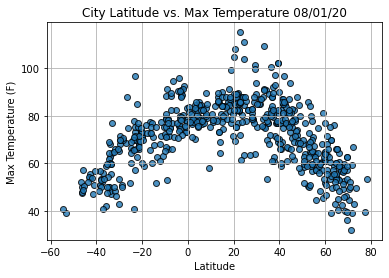

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

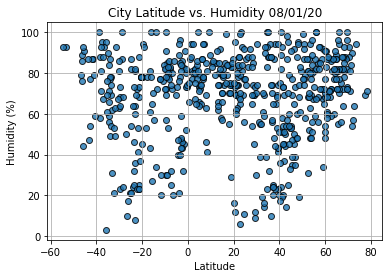

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

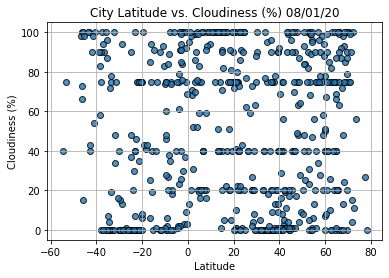

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

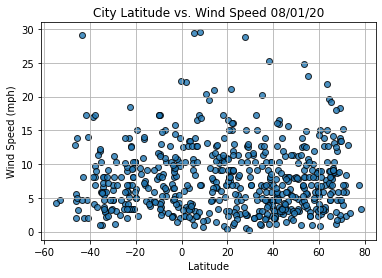

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [21]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                    Jamestown
Country                        US
Date          2020-08-01 16:06:54
Lat                          42.1
Lng                        -79.24
Max Temp                       77
Humidity                       69
Cloudiness                      1
Wind Speed                   9.17
Name: 13, dtype: object

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Lovozero,RU,2020-08-01 16:06:52,68.00,35.01,52.66,81,93,11.92
2,Hilo,US,2020-08-01 16:06:52,19.73,-155.09,71.60,83,90,6.93
3,Vila,PT,2020-08-01 16:06:52,42.03,-8.16,84.99,45,3,5.01
4,Tiksi,RU,2020-08-01 16:06:53,71.69,128.87,39.29,90,4,2.30
7,Tasiilaq,GL,2020-08-01 16:06:53,65.61,-37.64,53.60,55,20,5.82
...,...,...,...,...,...,...,...,...,...
577,Lagoa,PT,2020-08-01 16:08:03,39.05,-27.98,70.70,68,0,8.55
579,Bairiki,KI,2020-08-01 16:08:03,1.33,172.98,80.60,88,20,10.29
580,Allada,BJ,2020-08-01 16:08:03,6.67,2.15,82.40,78,40,12.75
581,Kita,ML,2020-08-01 16:08:03,13.03,-9.49,86.31,64,100,4.59


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

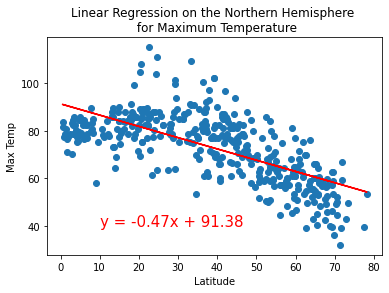

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

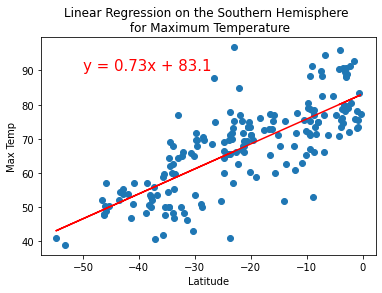

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

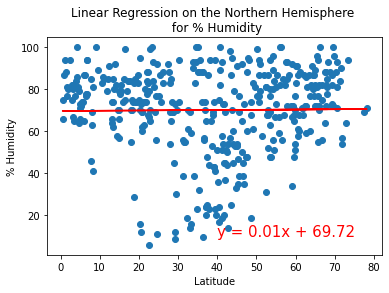

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

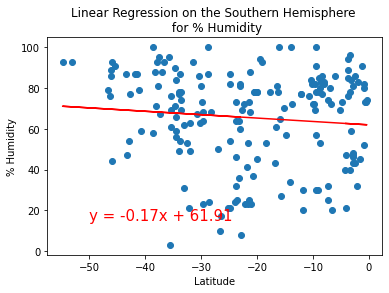

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

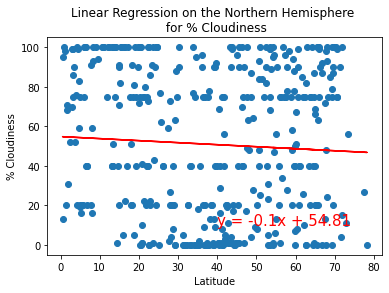

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

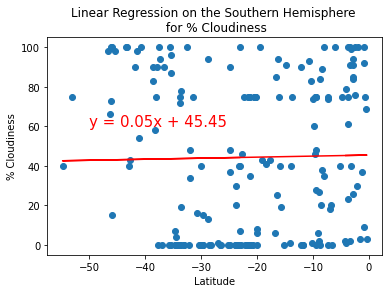

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

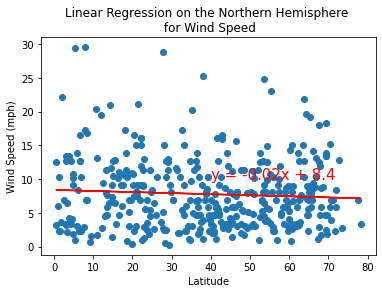

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(40,10))

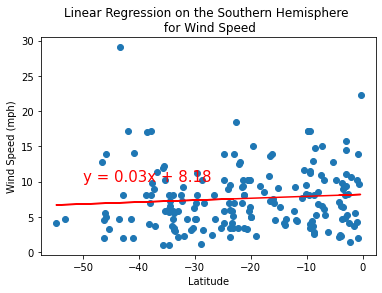

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-50,10))